In [1]:
# required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import plotly.express as px 
import seaborn as sns

# mapping imports
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [2]:
df = pd.read_csv('mod_eq_data.csv')

<AxesSubplot:xlabel='mag', ylabel='Count'>

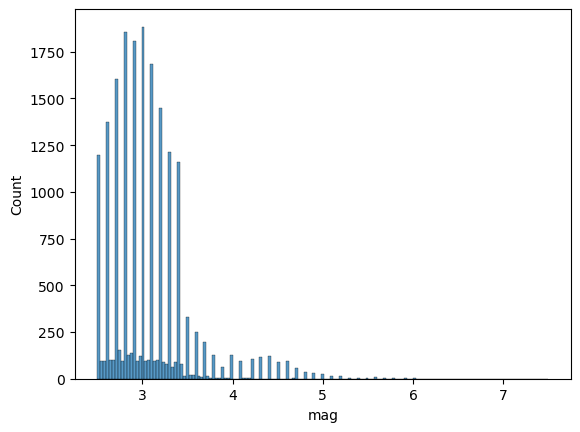

In [3]:
# plotting distribution of magnitudes

sns.histplot(data=df, x='mag')

<AxesSubplot:xlabel='mag', ylabel='Count'>

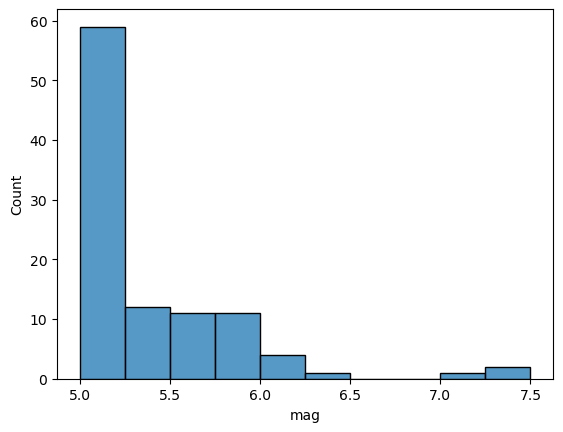

In [4]:
# Earthquakes greater than or equal to 5
sns.histplot(data=df.loc[df['mag'] >= 5], x='mag')

<AxesSubplot:xlabel='mag', ylabel='Count'>

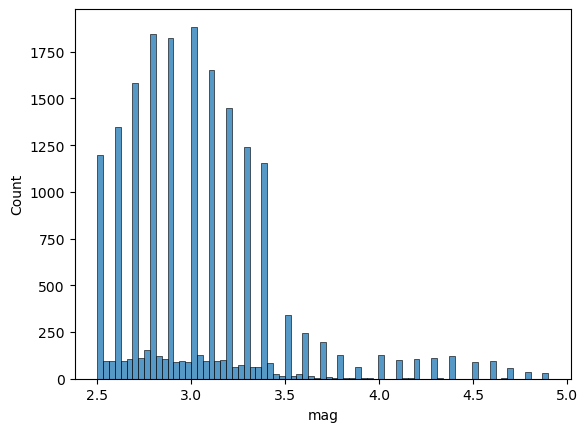

In [5]:
# Earthquakes less than 5
sns.histplot(data=df.loc[df['mag'] < 5], x='mag')

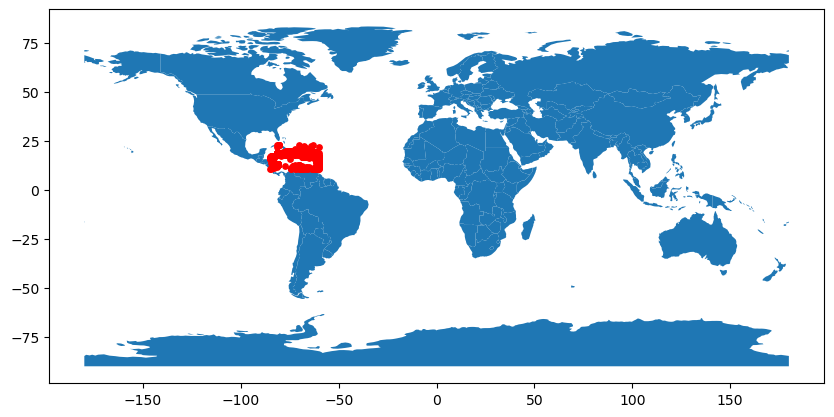

In [6]:

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [7]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="country", 
                        hover_data=["country", "mag"],
                        color='mag',
                        color_continuous_scale=color_scale,
                        size="mag",
                        zoom=8, 
                        height=500,
                        width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<AxesSubplot:xlabel='depth', ylabel='Count'>

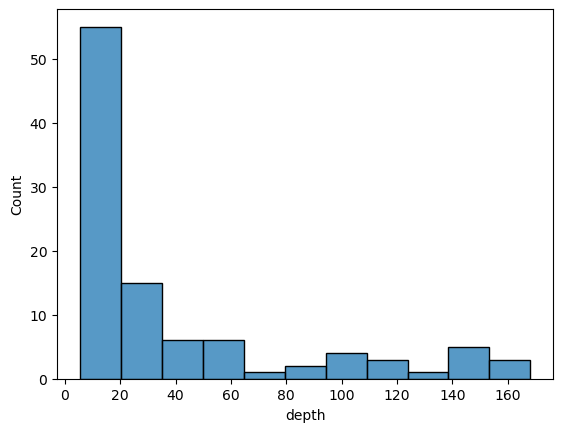

In [8]:
# Earthquakes greater than or equal to 5
sns.histplot(data=df.loc[df['mag'] >= 5], x='depth')

<AxesSubplot:xlabel='depth', ylabel='Count'>

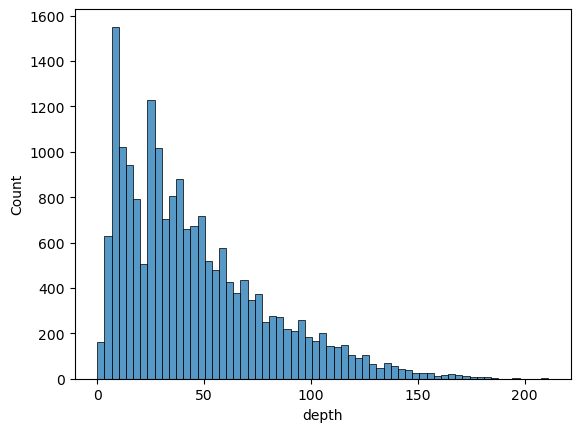

In [9]:
# Earthquakes less than or equal to 5
sns.histplot(data=df.loc[df['mag'] < 5], x='depth')

<AxesSubplot:xlabel='depth', ylabel='Count'>

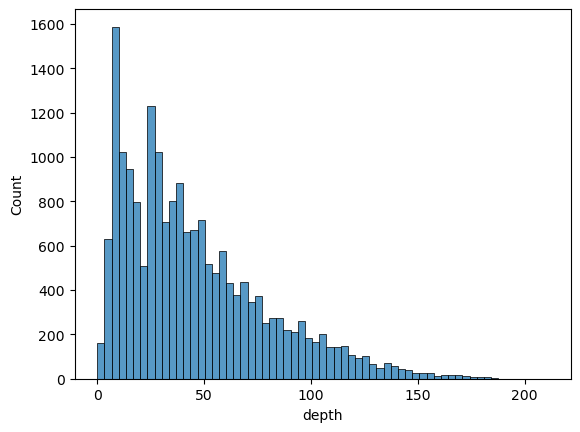

In [10]:
# Earthquakes greater than or equal to 5
sns.histplot(data=df, x='depth')

# describe right skewed distribution of earthquake depth.
# imbalance of earthquakes (greater than and less than 5 mag)

In [11]:
# examing magnitude and depth over time 

#plt.plot(df.time, df.mag)

<AxesSubplot:xlabel='mag', ylabel='depth'>

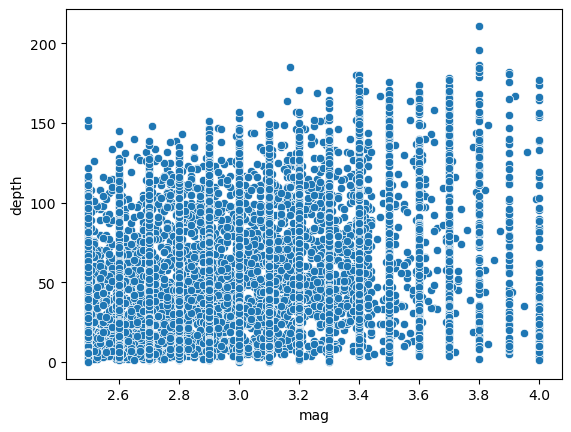

In [19]:
# mag x depth scatter 

sns.scatterplot(data=df, x='mag', y='depth')

[Text(0.5, 1.0, 'EQ Counts by Proximate Countries/Territories')]

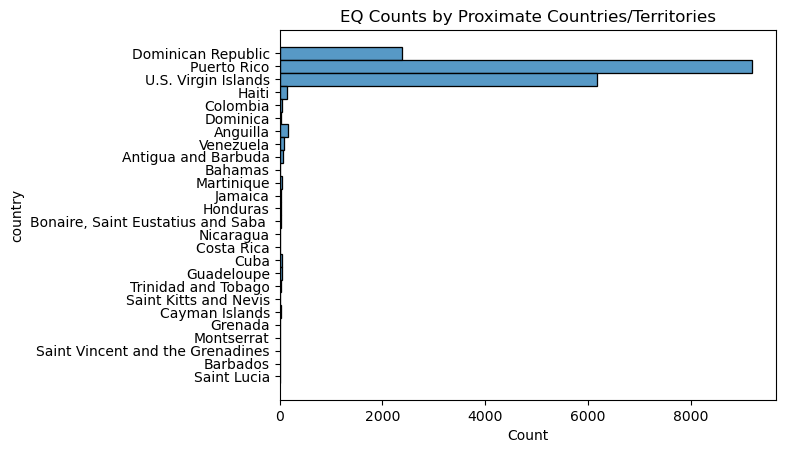

In [26]:
sns.histplot(data=df, y='country').set(title='EQ Counts by Proximate Countries/Territories')
# data is heavily imbalanced, majority of recorded earthquakes from 2009 
# and 2019 occured within or in proximity to Puerto Rico. For simplicity I will focus
# on the EQ ocurrences in Puerto Rico. This makes me curious about what may be different
# or domain specifically unique about PR for having more earthquakes 

[Text(0.5, 1.0, 'EQ Counts by Proximate Countries/Territories')]

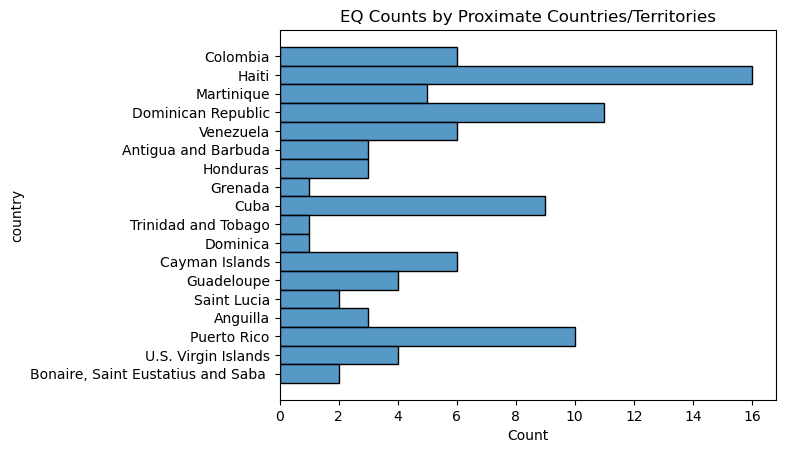

In [36]:
sns.histplot(data=df.loc[df['mag'] >= 5], y='country').set(title='EQ Counts by Proximate Countries/Territories')
# majority of  v

<AxesSubplot:xlabel='depth', ylabel='Count'>

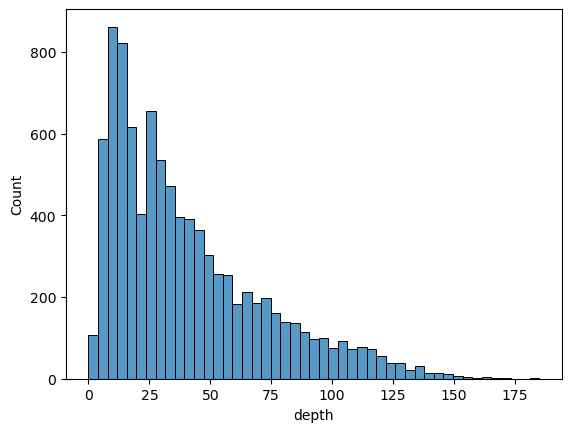

In [43]:
# look at magnitude distribution for Puerto Rico only 

sns.histplot(data=df.loc[df['country'] == 'Puerto Rico'], x='depth')

Text(0.5, 0.98, 'Stats by Country')

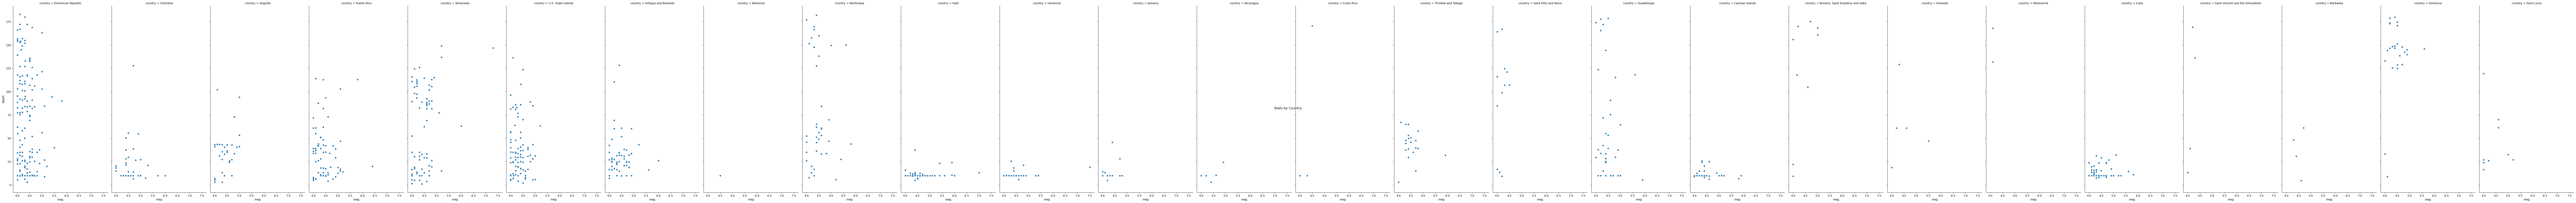

In [50]:
#create relplot
rel = sns.relplot(data=df.loc[df['mag'] >= 4], x='mag', y='depth', col='country')

#move overall title up
rel.fig.subplots_adjust(top=2)

#add overall title
rel.fig.suptitle('Stats by Country')

In [73]:
pr_df = df.loc[(df['country'] == 'Puerto Rico')]
pr_df.shape

(9183, 28)

In [74]:
df.loc[(df['country'] == 'Haiti')]

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,magError,magNst,status,locationSource,magSource,"city,region",dist_se,city,country,geometry
114,114,2018-12-16 16:15:45.350000+00:00,18.6468,-72.0948,10.00,3.5,ml,NaN,80.0,0.230,...,0.071,26.0,reviewed,us,us,"Thomazeau, Haiti",0.0,Thomazeau,Haiti,POINT (-72.09480 18.64680)
529,529,2018-10-17 02:05:26+00:00,20.0612,-72.9869,12.64,4.4,mb,NaN,52.0,1.662,...,0.098,30.0,reviewed,us,us,"Port-de-Paix, Haiti",21.0,Port-de-Paix,Haiti,POINT (-72.98690 20.06120)
576,576,2018-10-08 05:04:26.610000+00:00,20.2143,-72.9239,10.00,4.4,mb,NaN,79.0,1.783,...,0.148,13.0,reviewed,us,us,"Port-de-Paix, Haiti",31.0,Port-de-Paix,Haiti,POINT (-72.92390 20.21430)
578,578,2018-10-07 20:00:18.890000+00:00,20.0414,-73.0143,23.00,5.4,mww,NaN,27.0,1.655,...,0.054,33.0,reviewed,us,us,"Port-de-Paix, Haiti",22.0,Port-de-Paix,Haiti,POINT (-73.01430 20.04140)
586,586,2018-10-07 00:11:51.220000+00:00,20.0343,-73.0128,24.00,5.9,mww,NaN,19.0,1.648,...,0.055,32.0,reviewed,us,us,"Port-de-Paix, Haiti",21.0,Port-de-Paix,Haiti,POINT (-73.01280 20.03430)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17369,17369,2010-01-12 23:07:03.740000+00:00,18.5220,-72.5850,10.00,4.6,mb,30.0,50.9,NaN,...,NaN,2.0,reviewed,us,us,"Léogâne, Haiti",5.0,Léogâne,Haiti,POINT (-72.58500 18.52200)
17372,17372,2010-01-12 22:09:11.620000+00:00,18.4460,-72.6420,10.00,4.1,mb,22.0,54.9,NaN,...,NaN,1.0,reviewed,us,us,"Léogâne, Haiti",7.0,Léogâne,Haiti,POINT (-72.64200 18.44600)
17373,17373,2010-01-12 22:07:02.040000+00:00,18.4630,-72.6260,10.00,5.0,mb,32.0,84.1,NaN,...,NaN,4.0,reviewed,us,us,"Léogâne, Haiti",5.0,Léogâne,Haiti,POINT (-72.62600 18.46300)
17374,17374,2010-01-12 22:00:41.490000+00:00,18.3870,-72.7840,10.00,6.0,mwc,196.0,24.1,NaN,...,NaN,NaN,reviewed,us,gcmt,"Grangwav, Haiti",4.0,Grangwav,Haiti,POINT (-72.78400 18.38700)


<AxesSubplot:xlabel='mag', ylabel='depth'>

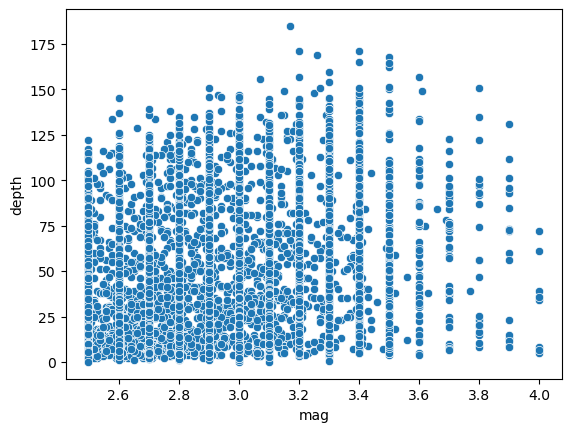

In [68]:
sns.scatterplot(data=pr_df, x='mag', y='depth')

<AxesSubplot:xlabel='time', ylabel='mag'>

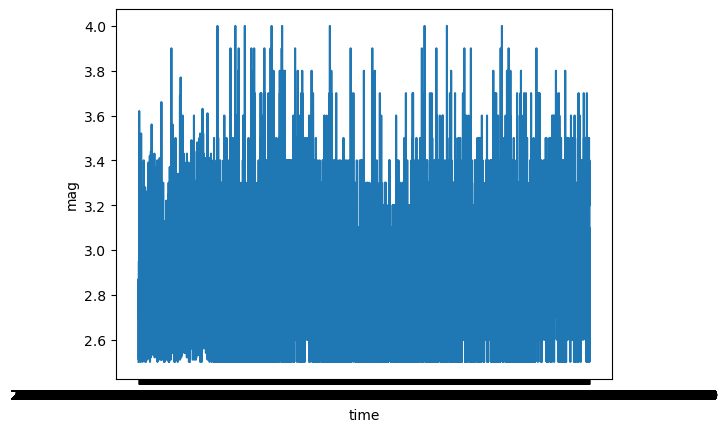

In [69]:
# time series plots/ use colab to run large data 
# time series forecasting may not be useful since it may not be the best to forecast magnitude and eq occurences; based on previous research. 
# sns.lineplot(data=pr_df, x='time', y='mag')

In [72]:
df.loc[df['country'] == 'Puerto Rico']['magType'].unique()

array(['md', 'ml', 'mb', 'Md', 'Ml', 'Unknown', 'Mb', 'mww', 'mwr', 'mwc'],
      dtype=object)

In [75]:
# extracting subsets for Puerto Rico and Haiti
df_HAT = df.loc[df['country'] == 'Haiti']
df_PR = df.loc[df['country'] == 'Puerto Rico']

In [ ]:
# correlation matrix 